## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
%matplotlib inline
import warnings; warnings.filterwarnings('ignore')

---
## 讀入資料

In [28]:
df = pd.read_csv('../data/Titanic_train.csv')

In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.250,NaN,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.050,NaN,S
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.050,NaN,S
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.225,NaN,S


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

---
## 觀察 Age

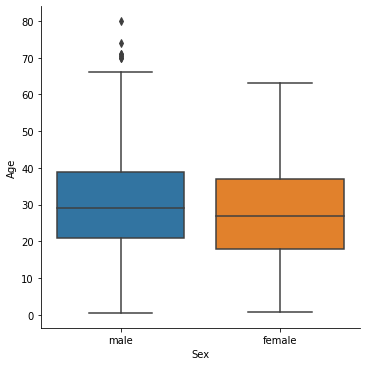

In [11]:
g = sns.catplot(
    x='Sex', 
    y='Age',  
    data=df,
    kind='box'
)

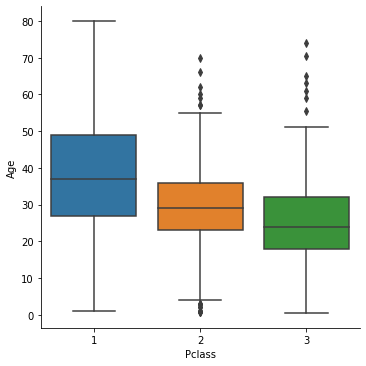

In [19]:
g = sns.catplot(
    x='Pclass', 
    y='Age',  
    data=df,
    kind='box'
)

* Pclass數字越大，年齡越低的趨勢

### Step1: 離散轉連續型資料

In [23]:
from sklearn import preprocessing

In [29]:
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
list(le.classes_)

['female', 'male']

In [30]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


### Step 2: 計算資料點的倆倆距離

In [22]:
from sklearn.metrics.pairwise import nan_euclidean_distances

In [34]:
distance = nan_euclidean_distances(df[['Age', 'Pclass', 'Sex']])
distance

array([[ 0.        , 16.15549442,  4.12310563, ...,  1.22474487,
         4.47213595, 10.        ],
       [16.15549442,  0.        , 12.16552506, ...,  2.44948974,
        12.04159458,  6.40312424],
       [ 4.12310563, 12.16552506,  0.        , ...,  0.        ,
         2.23606798,  6.08276253],
       ...,
       [ 1.22474487,  2.44948974,  0.        , ...,  0.        ,
         2.73861279,  1.22474487],
       [ 4.47213595, 12.04159458,  2.23606798, ...,  2.73861279,
         0.        ,  6.32455532],
       [10.        ,  6.40312424,  6.08276253, ...,  1.22474487,
         6.32455532,  0.        ]])

In [36]:
pd.DataFrame(distance).head()

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000


### Step3: 透過 KNN 進行補值

In [37]:
from sklearn.impute import KNNImputer

In [89]:
def impute_knn(data, neighbors, weights, indicator=False):
    imputer = KNNImputer(n_neighbors=neighbors, weights=weights, add_indicator=indicator)
    columns = list(data.columns) + ['imputed'] if indicator else data.columns
    return pd.DataFrame(imputer.fit_transform(data), columns=columns)

In [60]:
df_fill_n1_uni = impute_knn(df[['Age', 'Pclass', 'Sex']], 1, 'uniform', True)
df_fill_n1_uni

,Age,Pclass,Sex,imputed
0,22.0,3.0,1.0,0.0
1,38.0,1.0,0.0,0.0
2,26.0,3.0,0.0,0.0
3,35.0,1.0,0.0,0.0
4,35.0,3.0,1.0,0.0
...,...,...,...,...
886,27.0,2.0,1.0,0.0
887,19.0,1.0,0.0,0.0
888,26.0,3.0,0.0,1.0
889,26.0,1.0,1.0,0.0


In [61]:
df_fill_n1_dis = impute_knn(df[['Age', 'Pclass', 'Sex']], 1, 'distance', True)
df_fill_n1_dis

,Age,Pclass,Sex,imputed
0,22.0,3.0,1.0,0.0
1,38.0,1.0,0.0,0.0
2,26.0,3.0,0.0,0.0
3,35.0,1.0,0.0,0.0
4,35.0,3.0,1.0,0.0
...,...,...,...,...
886,27.0,2.0,1.0,0.0
887,19.0,1.0,0.0,0.0
888,26.0,3.0,0.0,1.0
889,26.0,1.0,1.0,0.0


In [62]:
df_fill_n3_uni = impute_knn(df[['Age', 'Pclass', 'Sex']], 3, 'uniform', True)
df_fill_n3_uni

,Age,Pclass,Sex,imputed
0,22.0,3.0,1.0,0.0
1,38.0,1.0,0.0,0.0
2,26.0,3.0,0.0,0.0
3,35.0,1.0,0.0,0.0
4,35.0,3.0,1.0,0.0
...,...,...,...,...
886,27.0,2.0,1.0,0.0
887,19.0,1.0,0.0,0.0
888,19.0,3.0,0.0,1.0
889,26.0,1.0,1.0,0.0


In [63]:
df_fill_n3_dis = impute_knn(df[['Age', 'Pclass', 'Sex']], 3, 'distance', True)
df_fill_n3_dis

,Age,Pclass,Sex,imputed
0,22.0,3.0,1.0,0.0
1,38.0,1.0,0.0,0.0
2,26.0,3.0,0.0,0.0
3,35.0,1.0,0.0,0.0
4,35.0,3.0,1.0,0.0
...,...,...,...,...
886,27.0,2.0,1.0,0.0
887,19.0,1.0,0.0,0.0
888,19.0,3.0,0.0,1.0
889,26.0,1.0,1.0,0.0


---
## MSE 評估

In [93]:
# Step1: 取無遺失值的資料集
df = pd.read_csv('../data/Titanic_train.csv')

nan_age = df[df['Age'].isna()==True].index  # 只刪除 Age 有遺失的 row
complete_df = df.drop(nan_age)
complete_df = complete_df.reset_index(drop=True)

le = preprocessing.LabelEncoder()
complete_df['Sex'] = le.fit_transform(complete_df['Sex'])
len(complete_df), complete_df.isna().sum()

(714,
 PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          529
 Embarked         2
 dtype: int64)

In [94]:
# Step2: 隨機取 100 個資料點，當作遺失值
import random
sample = random.sample(list(complete_df.index), 100)
print('random data index:', sample)

random data index: [588, 323, 337, 107, 694, 181, 189, 272, 159, 258, 503, 357, 639, 563, 568, 433, 310, 687, 259, 339, 195, 108, 465, 13, 497, 416, 480, 214, 483, 403, 32, 210, 541, 97, 505, 470, 514, 456, 274, 454, 519, 394, 251, 245, 554, 685, 551, 319, 303, 314, 373, 275, 603, 217, 654, 101, 374, 62, 141, 98, 361, 111, 136, 9, 606, 518, 557, 341, 417, 28, 429, 622, 220, 380, 468, 27, 666, 707, 198, 546, 78, 398, 574, 291, 106, 647, 18, 20, 58, 418, 11, 178, 709, 564, 643, 36, 14, 397, 620, 461]


In [95]:
missing_df = complete_df.copy()
missing_df['Age'].iloc[sample] = np.nan

In [96]:
missing_df[missing_df['Age'].isna()]  # 確認有 100 個資料被 調整為遺失值 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,NaN,1,1,PP 9549,16.7000,G6,S
11,13,0,3,"Saundercock, Mr. William Henry",1,NaN,0,0,A/5. 2151,8.0500,NaN,S
13,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",0,NaN,0,0,350406,7.8542,NaN,S
14,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",0,NaN,0,0,248706,16.0000,NaN,S
18,22,1,2,"Beesley, Mr. Lawrence",1,NaN,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
685,858,1,1,"Daly, Mr. Peter Denis",1,NaN,0,0,113055,26.5500,E17,S
687,861,0,3,"Hansen, Mr. Claus Peter",1,NaN,2,0,350026,14.1083,NaN,S
694,870,1,3,"Johnson, Master. Harold Theodor",1,NaN,1,1,347742,11.1333,NaN,S
707,884,0,2,"Banfield, Mr. Frederick James",1,NaN,0,0,C.A./SOTON 34068,10.5000,NaN,S


In [111]:
# Step3: 將 Step2 產生的遺失值進行補值
# 測試各種不同 k 數
verify_df_n3_uni = impute_knn(missing_df[['Age', 'Pclass', 'Sex']], 3, 'uniform')
verify_df_n3_dis = impute_knn(missing_df[['Age', 'Pclass', 'Sex']], 3, 'distance')
verify_df_n20_uni = impute_knn(missing_df[['Age', 'Pclass', 'Sex']], 20, 'uniform')
verify_df_n20_dis = impute_knn(missing_df[['Age', 'Pclass', 'Sex']], 20, 'distance')
verify_df_n50_uni = impute_knn(missing_df[['Age', 'Pclass', 'Sex']], 50, 'uniform')
verify_df_n50_dis = impute_knn(missing_df[['Age', 'Pclass', 'Sex']], 50, 'distance')

In [107]:
# Step4: 計算 MSE 看補值的效果, 越低越準確
from sklearn.metrics import mean_squared_error as mse

In [114]:
y_true = complete_df['Age']

y_pred = verify_df_n3_uni['Age']
MSE_h = mse(y_true, y_pred)
print('k=3 (uniform)')
print('MSE:', MSE_h)
print('-------------')

y_pred = verify_df_n3_dis['Age']
MSE_h = mse(y_true, y_pred)
print('k=3 (distance)')
print('MSE:', MSE_h)
print('-------------')

y_true = complete_df['Age']
y_pred = verify_df_n20_uni['Age']
MSE_h = mse(y_true, y_pred)
print('k=20 (uniform)')
print('MSE:', MSE_h)
print('-------------')

y_pred = verify_df_n20_dis['Age']
MSE_h = mse(y_true, y_pred)
print('k=20 (distance)')
print('MSE:', MSE_h)
print('-------------')

y_pred = verify_df_n50_uni['Age']
MSE_h = mse(y_true, y_pred)
print('k=50 (uniform)')
print('MSE:', MSE_h)
print('-------------')

y_pred = verify_df_n50_dis['Age']
MSE_h = mse(y_true, y_pred)
print('k=50 (distance)')
print('MSE:', MSE_h)
print('-------------')

k=3 (uniform)
MSE: 32.95091230936819
-------------
k=3 (distance)
MSE: 32.95091230936819
-------------
k=20 (uniform)
MSE: 22.438504026610648
-------------
k=20 (distance)
MSE: 22.438504026610648
-------------
k=50 (uniform)
MSE: 22.912265715574232
-------------
k=50 (distance)
MSE: 22.912265715574232
-------------


* k 從 3 增加至 20: 誤差有降低
* k 從 20 增加至 50: 反而誤差有些微增加
* 所以 k 數也要依照數據的量和分佈做不同的測試